# Convolutional NN

In [1]:
import numpy as np
import gzip
import os
import pickle
from matplotlib import pyplot

from src.si.data import Dataset
from src.si.util.util import to_categorical

Load the MNIST dataset

In [2]:
def load_mnist(sample_size=None):
    DIR = os.path.dirname(os.path.realpath('.'))
    filename = os.path.join(DIR, 'datasets/mnist.pkl.gz')
    f = gzip.open(filename, 'rb')
    data = pickle.load(f, encoding='bytes')
    (x_train, y_train), (x_test, y_test) = data
    if sample_size:
        return Dataset(x_train[:sample_size],y_train[:sample_size]),Dataset(x_test,y_test)
    else:
        return Dataset(x_train,y_train),Dataset(x_test,y_test)

In [3]:
train,test = load_mnist(500)

In [4]:
def preprocess(train):
    # reshape and normalize input data 
    train.X = train.X.reshape(train.X.shape[0], 28, 28, 1)
    train.X = train.X.astype('float32')
    train.X /= 255
    train.Y = to_categorical(train.Y)

In [5]:
preprocess(train)
preprocess(test)

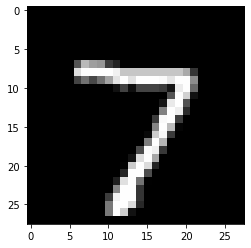

In [6]:
def plot_img(img,shape=(28,28)):
    pic = (img*255).reshape(shape)
    pic = pic.astype('int')
    pyplot.imshow(pic, cmap=pyplot.get_cmap('gray'))
    pyplot.show()

plot_img(test.X[0])

In [7]:
from si.supervised.nn import NN, Dense, Activation, Conv2D, Flatten
from si.util.activation import Tanh, Sigmoid

Build the model

In [8]:
net = NN(epochs=500,lr=0.1,verbose=True)
net.add(Conv2D((28, 28, 1), (3, 3), 1))
net.add(Activation(Tanh()))
net.add(Flatten())                     
net.add(Dense(26*26*1, 100))           
net.add(Activation(Tanh()))
net.add(Dense(100, 10))                
net.add(Activation(Sigmoid()))

Train the model

In [9]:
net.fit(train)

epoch 1/500 error=0.3641047013884341
epoch 2/500 error=0.35063056205110543
epoch 3/500 error=0.3396495522330033
epoch 4/500 error=0.3310348388379739
epoch 5/500 error=0.3240472567140478
epoch 6/500 error=0.3179676510372129
epoch 7/500 error=0.3123614251603781
epoch 8/500 error=0.30700624165135854
epoch 9/500 error=0.3017929168056298
epoch 10/500 error=0.2966679181290574
epoch 11/500 error=0.29160450904878443
epoch 12/500 error=0.2865887256664192
epoch 13/500 error=0.28161268613808843
epoch 14/500 error=0.2766714582002583
epoch 15/500 error=0.2717616001499167
epoch 16/500 error=0.2668804495112585
epoch 17/500 error=0.26202571980386075
epoch 18/500 error=0.2571952085569211
epoch 19/500 error=0.25238653823597396
epoch 20/500 error=0.247596906900923
epoch 21/500 error=0.2428228465084413
epoch 22/500 error=0.23805998787054544
epoch 23/500 error=0.2333028202081923
epoch 24/500 error=0.22854441435550168
epoch 25/500 error=0.22377605171158893
epoch 26/500 error=0.21898665990013438
epoch 27/500

In [11]:
out = net.predict(test.X[0:3])
print("\n")
print("predicted values : ")
print(np.round(out), end="\n")
print("true values : ")
print(test.Y[0:3])



predicted values : 
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
true values : 
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [12]:
conv = net.layers[0]

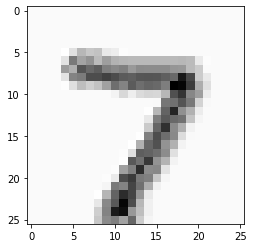

In [13]:
plot_img(conv.forward(test.X[:1]),shape=(26,26))

Add maxpooling layer

In [15]:
from src.si.supervised.nn import MaxPooling

net = NN(epochs=500,lr=0.1,verbose=True)
net.add(Conv2D((28, 28, 1), (3, 3), 1))
net.add(Activation(Tanh()))
net.add(MaxPooling((2, 2)))
net.add(Activation(Tanh()))
net.add(Flatten())
net.add(Dense(26*26*1, 100))
net.add(Activation(Tanh()))
net.add(Dense(100, 10))
net.add(Activation(Sigmoid()))

Train model again

In [ ]:
net.fit(train)

conv = net.layers[0]

plot_img(conv.forward(test.X[:1]),shape=(26,26))